## Data from the FHFA
The following data is from the Federal Housing Finance Agency. It is their Housing Price Index quarterly report and includes data from 1991 until the first quarter of 2018. You can find the report here: https://www.fhfa.gov/AboutUs/Reports/ReportDocuments/2018Q1_HPI.pdf,
and all HPI data here:
https://www.fhfa.gov/DataTools/Downloads/pages/house-price-index.aspx.

All data used here is seasonally adjusted.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

# get the data
fhfa_df = pd.read_excel("https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_PO_state.xls")

fhfa_df.sort_values(by=["yr","qtr"],ascending=False).head(10)

,state,yr,qtr,index_nsa,index_sa,Warning
108,AK,2018,1,255.34,258.32,"* Note that this state has fewer than 15,000 t..."
217,AL,2018,1,213.10,214.26,NaN
326,AR,2018,1,214.38,214.28,NaN
435,AZ,2018,1,308.33,310.03,NaN
544,CA,2018,1,277.87,278.71,NaN
653,CO,2018,1,456.47,455.99,NaN
762,CT,2018,1,172.04,174.28,NaN
871,DC,2018,1,547.22,552.57,"* Note that this state has fewer than 15,000 t..."
980,DE,2018,1,207.29,207.35,"* Note that this state has fewer than 15,000 t..."
1089,FL,2018,1,299.06,300.01,NaN


### Nationwide Data:

In [2]:
us_df = pd.read_excel("https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_PO_summary.xls")
us_df.sort_values(by=['Year', 'Quarter'], ascending=False).head()

,Region,Year,Quarter,Not Seasonally-Adjusted Purchase-Only Index (1991Q1=100),Seasonally-Adjusted Purchase-Only Index (1991Q1=100),Not Seasonally-Adjusted Purchase-Only Index % Change Over Previous 4 Quarters,Not Seasonally-Adjusted Purchase-Only Index % Change Over Previous Quarter,Seasonally-Adjusted Purchase-Only Index % Change Over Previous 4 Quarters,Seasonally-Adjusted Purchase-Only Index % Change Over Previous Quarter
108,USA,2018,1,255.45,256.94,0.0692,0.0120,0.0689,0.0169
107,USA,2017,4,252.43,252.65,0.0683,0.0040,0.0682,0.0172
106,USA,2017,3,251.41,248.37,0.0673,0.0144,0.0675,0.0156
105,USA,2017,2,247.85,244.56,0.0679,0.0374,0.0680,0.0174
104,USA,2017,1,238.91,240.37,0.0649,0.0111,0.0644,0.0163


### The last year: Q1 2017 to Q1 2018

In [3]:
df18q1 = fhfa_df[(fhfa_df["yr"] == 2018)&(fhfa_df["qtr"] == 1)].set_index("state")
df17q1 = fhfa_df[(fhfa_df["yr"] == 2017)&(fhfa_df["qtr"] == 1)].set_index("state")
df1718q1 = df17q1.join(df18q1,how="outer",lsuffix="_17",rsuffix="_18").reset_index()

# sa_diff = Q1 2018 - Q1 2017
df1718q1["sa_diff"] = df1718q1["index_sa_18"] - df1718q1["index_sa_17"]

# Growth = sa_diff * 100 / index_sa_2017
df1718q1["sa_growth"] = df1718q1["sa_diff"] * 100 / df1718q1["index_sa_17"]

# Take a look
df1718q1.head(10).sort_values(by="state",ascending=False)

,state,yr_17,qtr_17,index_nsa_17,index_sa_17,Warning_17,yr_18,qtr_18,index_nsa_18,index_sa_18,Warning_18,sa_diff,sa_growth
9,FL,2017,1,275.88,276.84,NaN,2018,1,299.06,300.01,NaN,23.17,8.369455
8,DE,2017,1,192.21,192.49,"* Note that this state has fewer than 15,000 t...",2018,1,207.29,207.35,"* Note that this state has fewer than 15,000 t...",14.86,7.719882
7,DC,2017,1,511.51,515.95,"* Note that this state has fewer than 15,000 t...",2018,1,547.22,552.57,"* Note that this state has fewer than 15,000 t...",36.62,7.097587
6,CT,2017,1,166.07,168.15,NaN,2018,1,172.04,174.28,NaN,6.13,3.645555
5,CO,2017,1,412.10,412.17,NaN,2018,1,456.47,455.99,NaN,43.82,10.631536
4,CA,2017,1,255.24,256.02,NaN,2018,1,277.87,278.71,NaN,22.69,8.862589
3,AZ,2017,1,281.67,283.24,NaN,2018,1,308.33,310.03,NaN,26.79,9.458410
2,AR,2017,1,206.77,206.55,NaN,2018,1,214.38,214.28,NaN,7.73,3.742435
1,AL,2017,1,206.19,207.27,NaN,2018,1,213.10,214.26,NaN,6.99,3.372413
0,AK,2017,1,248.63,251.65,"* Note that this state has fewer than 15,000 t...",2018,1,255.34,258.32,"* Note that this state has fewer than 15,000 t...",6.67,2.650507


### Compare Q1 2016 with Q1 2017

In [4]:
df17q1 = fhfa_df[(fhfa_df["yr"] == 2017)&(fhfa_df["qtr"] == 1)].set_index("state")
df16q1 = fhfa_df[(fhfa_df["yr"] == 2016)&(fhfa_df["qtr"] == 1)].set_index("state")
df1617q1 = df16q1.join(df17q1,how="outer",lsuffix="_16",rsuffix="_17").reset_index()

df1617q1["sa_diff"] = df1617q1["index_sa_17"] - df1617q1["index_sa_16"]
df1617q1["sa_growth"] = df1617q1["sa_diff"] * 100 / df1617q1["index_sa_16"]
df1617q1.head(10).sort_values(by="state",ascending=False)

,state,yr_16,qtr_16,index_nsa_16,index_sa_16,Warning_16,yr_17,qtr_17,index_nsa_17,index_sa_17,Warning_17,sa_diff,sa_growth
9,FL,2016,1,250.16,251.13,NaN,2017,1,275.88,276.84,NaN,25.71,10.237725
8,DE,2016,1,191.73,192.45,"* Note that this state has fewer than 15,000 t...",2017,1,192.21,192.49,"* Note that this state has fewer than 15,000 t...",0.04,0.020785
7,DC,2016,1,445.22,449.11,"* Note that this state has fewer than 15,000 t...",2017,1,511.51,515.95,"* Note that this state has fewer than 15,000 t...",66.84,14.882768
6,CT,2016,1,163.71,165.72,NaN,2017,1,166.07,168.15,NaN,2.43,1.466329
5,CO,2016,1,370.74,371.69,NaN,2017,1,412.10,412.17,NaN,40.48,10.890796
4,CA,2016,1,237.36,238.17,NaN,2017,1,255.24,256.02,NaN,17.85,7.494647
3,AZ,2016,1,261.77,263.38,NaN,2017,1,281.67,283.24,NaN,19.86,7.540436
2,AR,2016,1,199.62,199.30,NaN,2017,1,206.77,206.55,NaN,7.25,3.637732
1,AL,2016,1,195.85,196.87,NaN,2017,1,206.19,207.27,NaN,10.40,5.282674
0,AK,2016,1,241.20,244.21,"* Note that this state has fewer than 15,000 t...",2017,1,248.63,251.65,"* Note that this state has fewer than 15,000 t...",7.44,3.046558


In [5]:
# What was the difference in CT HPI?
ct_1718q1 = df1718q1[df1718q1['state'] == 'CT']
ct_1718q1.index_sa_18 - ct_1718q1.index_sa_17

6    6.13
dtype: float64

In [6]:
# Get CT info from the first quarter of 2017
ct_1617q1 = df1617q1[df1617q1['state'] == 'CT']

# How much of an increase in growth rate has CT seen?
ct_1718q1.sa_growth - ct_1617q1.sa_growth

6    2.179226
Name: sa_growth, dtype: float64

### How does that compare to what's happening nationwide?
### Nationwide growth from Q1 2017 to Q1 2018

In [7]:
df1718q1["sa_growth"].describe()

count    51.000000
mean      6.241665
std       2.891614
min       0.853566
25%       3.693995
50%       6.217479
75%       7.750625
max      13.710565
Name: sa_growth, dtype: float64

It looks like the nationwide average growth rate is 6.24%. According to the above data, CT was at just 3.64% this last year.

### Nationwide growth from Q1 2016 to Q1 2017

In [8]:
df1617q1["sa_growth"].describe()

count    51.000000
mean      5.942746
std       2.931013
min       0.020785
25%       4.104140
50%       5.664674
75%       7.742328
max      14.882768
Name: sa_growth, dtype: float64

The average nationwide growth rate has increased a bit in the last year.

### A timeline of the Housing Price Index
I want to know how the general trend of CT housing prices compares to the national trends.

In [9]:
def timeline(df,y_col="Year",q_col="Quarter",
             val_col='Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100)',
            index_col="Region"):
    ret = df.copy()
    
    #ret ["y-q"] = ret.apply(lambda x: str(x["Year"]) + "-" + str(x["Quarter"]),axis=1)

    ret = ret[ret[q_col] == 1]
    ret = ret.pivot(columns=y_col,
                    values=val_col,
                    index=index_col)\
    .reset_index()\
    .transpose()
    
    
    ret = ret.reset_index()#.set_index("y-q")

    ret.columns = "year","index"
    ret = ret.drop(0)
    
    ret = ret.set_index("year")
    
    return ret

us_timeline = timeline(us_df)

In [10]:
ct_timeline = timeline(fhfa_df[fhfa_df["state"] == "CT"],q_col="qtr",y_col="yr",val_col="index_sa",index_col="state")
print(ct_timeline.join(us_timeline,how="outer",lsuffix="_CT",rsuffix="_US").to_csv(sep="\t"))

year	index_CT	index_US
1991	100.0	100.0
1992	97.42	102.28
1993	92.64	103.9
1994	91.52	107.72
1995	90.91	110.58
1996	91.22	113.86
1997	91.35	116.78
1998	94.06	121.39
1999	101.97	128.61
2000	110.84	136.96
2001	120.94	146.64
2002	133.22	156.25
2003	149.85	168.37
2004	163.97	182.4
2005	183.48	201.47
2006	197.35	219.87
2007	198.06	224.38
2008	190.54	212.1
2009	179.01	194.3
2010	171.34	188.64
2011	165.39	178.8
2012	160.16	179.28
2013	161.14	191.39
2014	164.58	203.47
2015	164.74	213.41
2016	165.72	225.82
2017	168.15	240.37
2018	174.28	256.94



Note: These (seasonally adjusted) index values are relative to 1991, so the final row means that in 2018, CT housing prices were 174.28% of what they were in 1991.

The nationwide index has already exceeded what it was pre-2008. This is not the case with CT.

### Percent Difference by State

In [11]:
states_pct_df = df1718q1.sort_values(by="sa_growth",ascending=True)[["state","sa_growth"]].set_index("state")
states_pct_df["sa_growth"] = states_pct_df["sa_growth"].apply(lambda x: round(x,2))
states_pct_df["sa_growth"] = states_pct_df["sa_growth"].astype(str) + "%"

states_pct_df.head(50)

,sa_growth
state,
WV,0.85%
OK,1.52%
MS,2.17%
ND,2.3%
VT,2.59%
AK,2.65%
IL,2.8%
NM,2.98%
SD,3.09%


2017-2018 first quarters: CT ranks at 38th highest growth out of the 50 states.

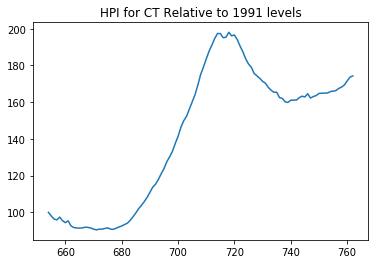

In [12]:
# Plot CT trends from HPI data
hpi_ct = fhfa_df[fhfa_df['state'] == 'CT'] # get CT
hpi_ct.index_sa.plot(title = "HPI for CT Relative to 1991 levels")

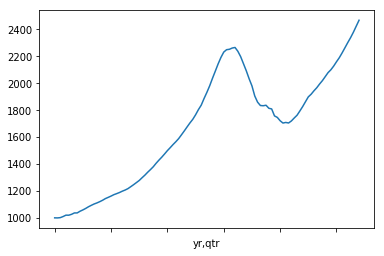

In [46]:
# Load in nationwwide HPI data from FHFA
hpi_national = pd.read_excel("https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_EXP_us_and_census.xls")
hpi_national.groupby(['yr', 'qtr']).index_sa.sum().plot()

Notice that, on average nationwide, HPI has exceeded what it used to be before the plummet-- but that is not the case with CT quite yet.